Author: Brian Erichsen Fagundes
Summer - 2024
UofU Masters in Software Development
Homework 4 - Implementing + Evaluating Spatial Partioning

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# load the data
data_frame = pd.read_csv('timing2.csv')

print(data_frame.head())

  testType structType  k     N  D distribution   timing  trial
0        k     bucket  1  1000  2            G  1028674      1
1        k     bucket  1  1000  2            G   992180      2
2        k     bucket  1  1000  2            G  1061292      3
3        k     bucket  5  1000  2            G  1118341      1
4        k     bucket  5  1000  2            G  1057855      2


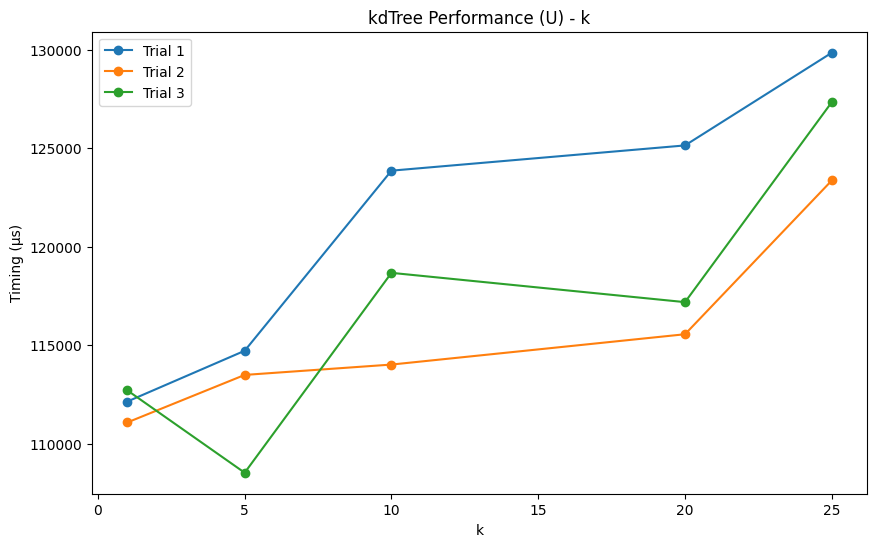

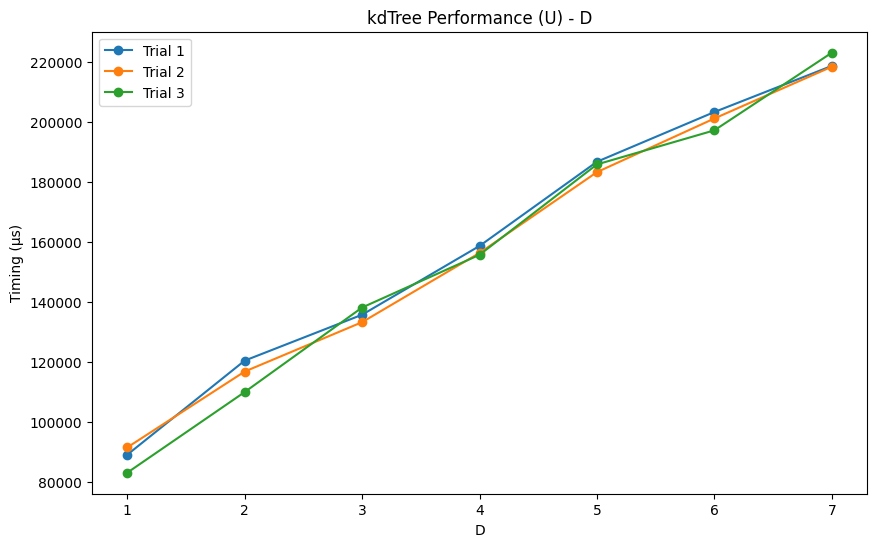

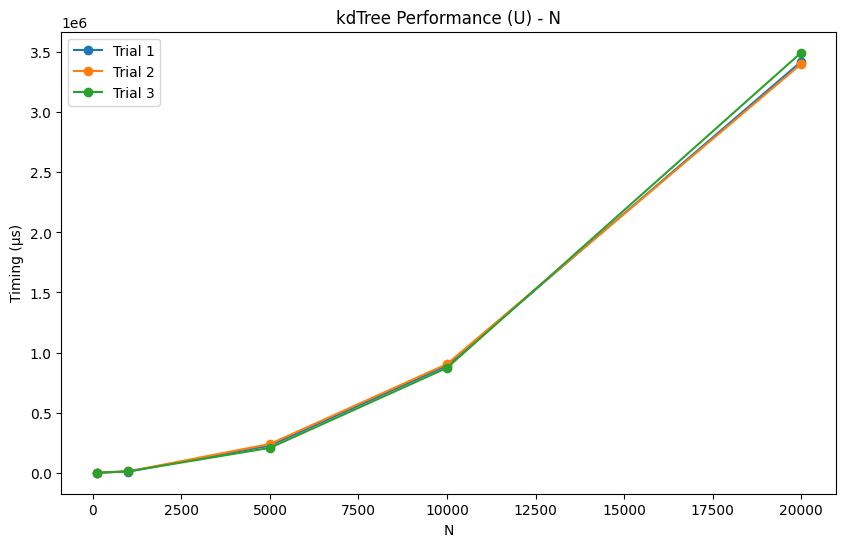

In [32]:
# Visualize the impact of k, N and D
def plot_parameter_impact(data, test_type, struct_type, param, distribution, y='timing'):
    subset = data[(data['structType'] == struct_type) & (data['distribution'] == distribution)
                  & (data['testType'] == test_type)]
    plt.figure(figsize=(10, 6))
    for trial in subset['trial'].unique():
        trial_data = subset[subset['trial'] == trial]
        plt.plot(trial_data[param], trial_data[y], marker='o', label=f'Trial {trial}')
    plt.title(f'{struct_type} Performance ({distribution}) - {param}')
    plt.xlabel(param)
    plt.ylabel('Timing (µs)')
    plt.legend()
    plt.show()

# plotting data for KDtree performance using Uniform Distribution
plot_parameter_impact(data_frame, 'k', 'kdTree', 'k', 'U')
plot_parameter_impact(data_frame, 'd', 'kdTree', 'D', 'U')
plot_parameter_impact(data_frame, 'n', 'kdTree', 'N', 'U')

For the Uniform distribution using the KDtree data structure:
    - k: Best value for performance seems to be 5. Higher number of k seems to lead to poorer performance.
    - D: As the dimension of coordinates increases the timing seems to have a linear relationship with how many dimensions is being used.

   testType structType   k     N  D distribution   timing  trial
0         k     bucket   1  1000  2            G  1028674      1
3         k     bucket   5  1000  2            G  1118341      1
6         k     bucket  10  1000  2            G   995933      1
9         k     bucket  20  1000  2            G  1042035      1
12        k     bucket  25  1000  2            G  1051275      1


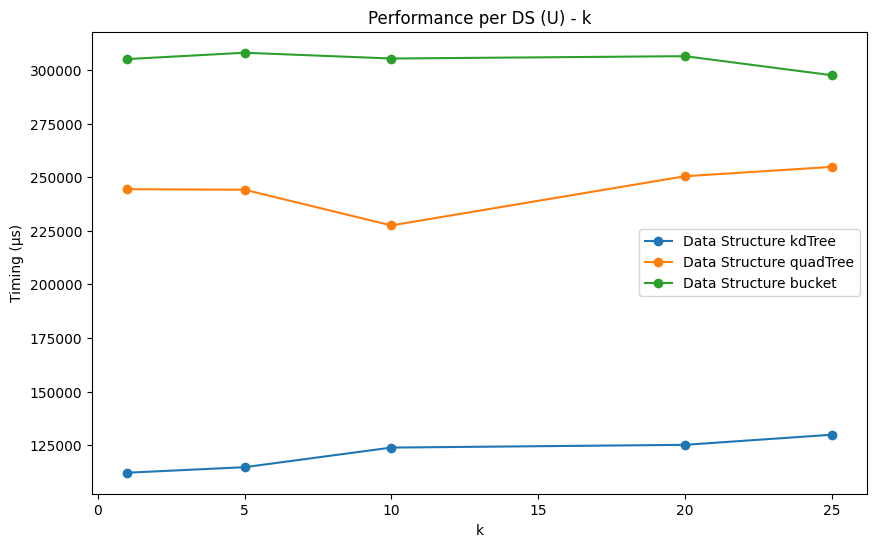

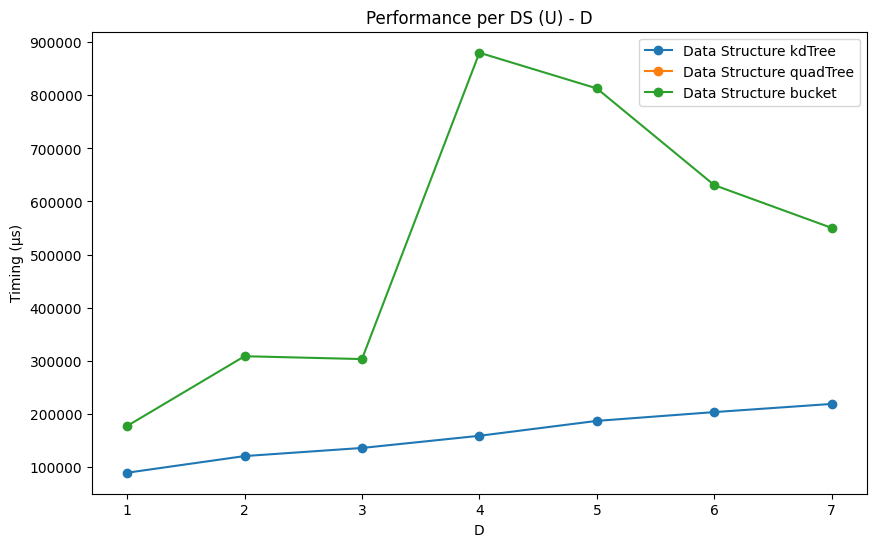

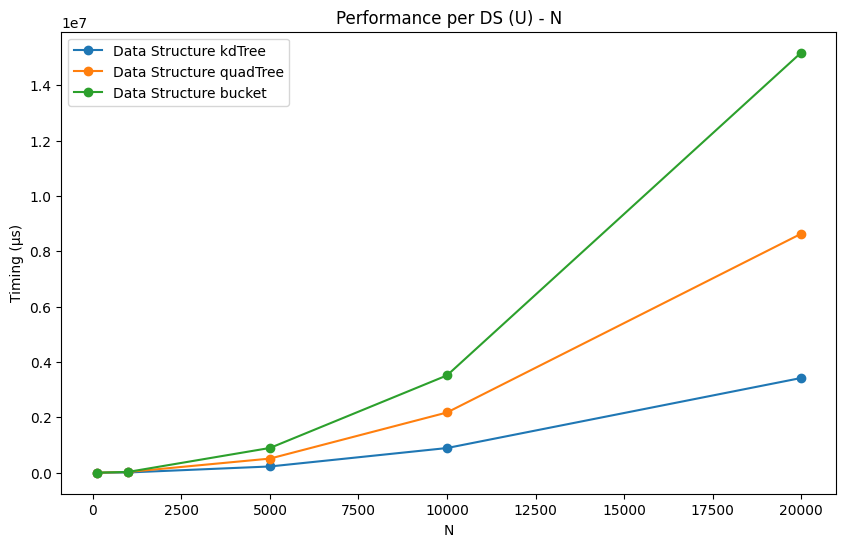

In [33]:
# which data structure performs better?

# comparing timing per trial
data_trial = data_frame[data_frame['trial'] == 1]
print (data_trial.head())

def plot_DS_impact(data, test_type, struct_type, struct_type2, struct_type3, param, distribution, y='timing'):
    subset = data[(data['structType'] == struct_type) & (data['distribution'] == distribution)
                  & (data['testType'] == test_type)]
    subset2 = data[(data['structType'] == struct_type2) & (data['distribution'] == distribution)
                  & (data['testType'] == test_type)]
    subset3 = data[(data['structType'] == struct_type3) & (data['distribution'] == distribution)
                  & (data['testType'] == test_type)]
    plt.figure(figsize=(10, 6))
    
    plt.plot(subset[param], subset[y], marker='o', label=f'Data Structure {struct_type}')
    plt.plot(subset2[param], subset2[y], marker='o', label=f'Data Structure {struct_type2}')
    plt.plot(subset3[param], subset3[y], marker='o', label=f'Data Structure {struct_type3}')
    plt.title(f'Performance per DS ({distribution}) - {param}')
    plt.xlabel(param)
    plt.ylabel('Timing (µs)')
    plt.legend()
    plt.show()

plot_DS_impact(data_trial, 'k', 'kdTree', 'quadTree', 'bucket', 'k', 'U')
plot_DS_impact(data_trial, 'd', 'kdTree', 'quadTree', 'bucket', 'D', 'U')
plot_DS_impact(data_trial, 'n', 'kdTree', 'quadTree', 'bucket', 'N', 'U')

Overall the KDtree have a better performance when compared to the Bucket and the QuadTree. In the varying N experiment the KDtree shows efficient handling of larger datasets. In the varying D experiment the KDTree the timing increases with higher dimensions but the increase is more gradual compared to the Bucket KNN.

                            OLS Regression Results                            
Dep. Variable:                 timing   R-squared:                       0.161
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     12.32
Date:                Mon, 24 Jun 2024   Prob (F-statistic):           0.000826
Time:                        19:02:46   Log-Likelihood:                -998.55
No. Observations:                  66   AIC:                             2001.
Df Residuals:                      64   BIC:                             2005.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.017e+05    2.3e+05     -0.878      0.3

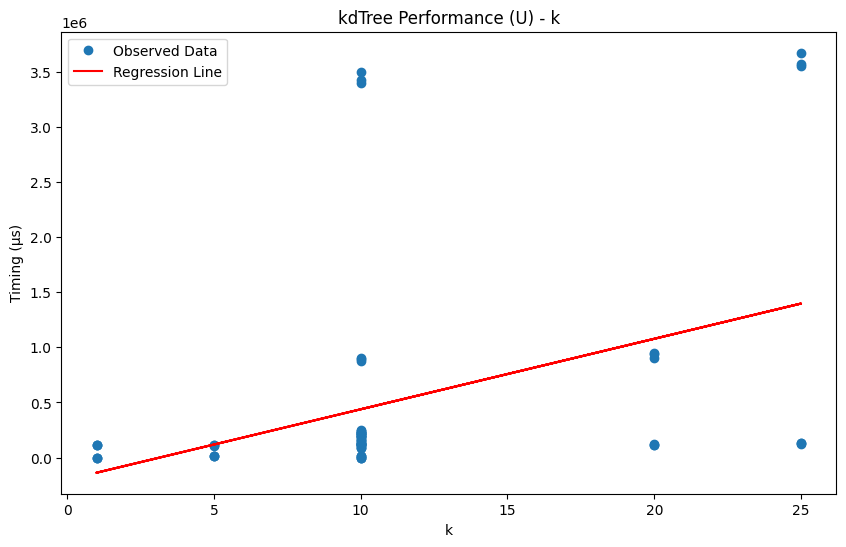

                            OLS Regression Results                            
Dep. Variable:                 timing   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     779.6
Date:                Mon, 24 Jun 2024   Prob (F-statistic):           1.50e-37
Time:                        19:02:46   Log-Likelihood:                -919.26
No. Observations:                  66   AIC:                             1843.
Df Residuals:                      64   BIC:                             1847.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.215e+05   4.05e+04     -2.996      0.0

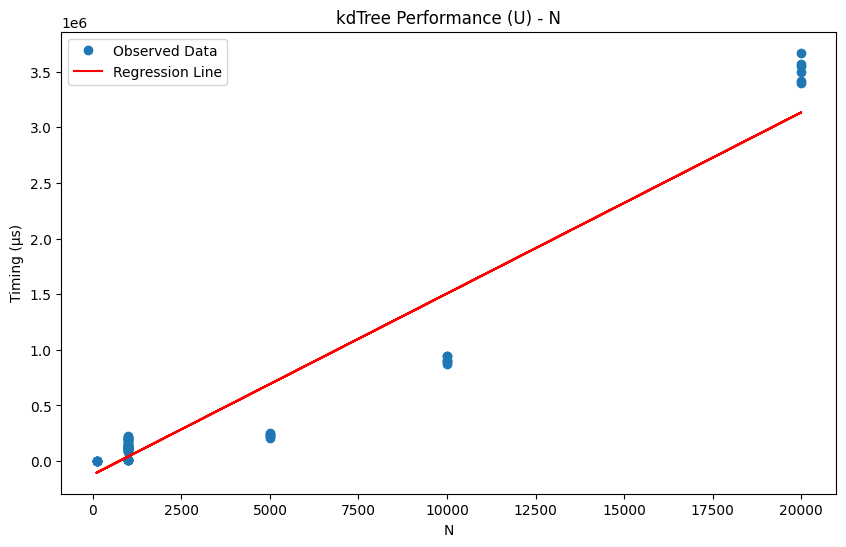

                            OLS Regression Results                            
Dep. Variable:                 timing   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.148
Date:                Mon, 24 Jun 2024   Prob (F-statistic):              0.288
Time:                        19:02:46   Log-Likelihood:                -1003.8
No. Observations:                  66   AIC:                             2012.
Df Residuals:                      64   BIC:                             2016.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.367e+05   2.51e+05      2.935      0.0

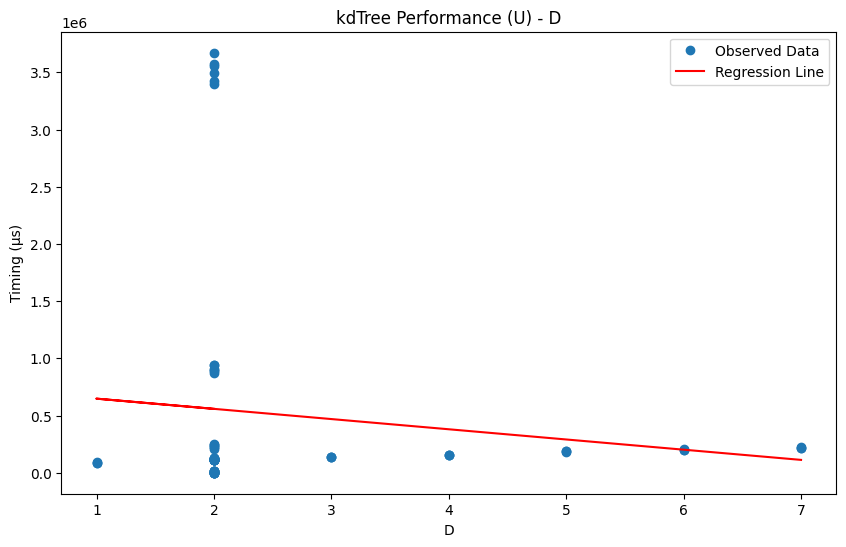

In [40]:
import statsmodels.api as sm
##function to call different param for regression
def perform_regression(data, struct_type, param, distribution, y='timing'):
    subset = data[(data['structType'] == struct_type) & (data['distribution'] == distribution)]
    # & (data['testType'] == test_type)
    X = subset[[param]]
    y = subset['timing']

    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()

    print(model.summary())
    # Plot the data and the regression line
    plt.figure(figsize=(10, 6))
    plt.plot(subset[param], y, 'o', label='Observed Data')
    plt.plot(subset[param], model.predict(X), 'r-', label='Regression Line')
    plt.xlabel(param)
    plt.ylabel('Timing (µs)')
    plt.title(f'{struct_type} Performance ({distribution}) - {param}')
    plt.legend()
    plt.show()

    
perform_regression(data_frame, 'kdTree', 'k', 'U')
perform_regression(data_frame, 'kdTree', 'N', 'U')
perform_regression(data_frame, 'kdTree', 'D', 'U')

The variable that seems to impact most the performance of a KDTree using Uniform distribution seems to be most affected by n (size). When holding all other variables constant, N predicts most of the variability of the total time it takes to complete the KNN search.

What running times do you expect to see based on simple big-O analysis? For the knn query.
- KDTree: O(logN + K)
- QuadTree: O(K logN)
- Bucket: O(k logN)


- As k increases, we expect the query time to increase linearly for KNN queries.
- As N increases, we expect the construction time and query time to increase logarithmically.
- As D increases, the performance may degrade significantly due to the curse of dimensionality, especially for KNN queries.


- k Analysis: The positive coefficient (6.393e+04) indicates that as k increases, the timing increases as well, which aligns with our expectation.
R-squared: The value (0.161) indicates that only 16.1% of the variability in timing can be explained by k, suggesting other factors are influencing the timing.

- N Analysis: The positive coefficient (162.7800) indicates that as N increases, the timing increases, which aligns with our expectation.
R-squared: The value (0.924) indicates that 92.4% of the variability in timing can be explained by N, suggesting a strong relationship between N and timing.

- D Analysis The negative coefficient (-8.921e+04) indicates that as D increases, the timing decreases, which is counterintuitive. This could be due to the small range of
D values.
R-squared: The value (0.018) indicates that only 1.8% of the variability in timing can be explained by
D, suggesting other factors are influencing the timing.

Aspects of the Data That Seem Unusual:
- Negative Coefficient for D:
The negative coefficient for D in the KDTree model suggests a counterintuitive relationship. This happens due to a lot of data of higher N or higher K with the dimension set at 2. When analysing the data itself with varying Ds but set other variables the timing tends to be slower as the D increases.